> RoyChao

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set( style="ticks" )

df_dataset = pd.read_csv("data/2_df2_elec.csv", index_col=0)
print(df_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 391
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OR      392 non-null    int64  
 1   date    392 non-null    int64  
 2   s_min   392 non-null    int64  
 3   s_max   392 non-null    int64  
 4   s_skew  392 non-null    float64
 5   s_kurt  392 non-null    float64
 6   d_min   392 non-null    int64  
 7   d_max   392 non-null    int64  
 8   d_skew  392 non-null    float64
 9   d_kurt  392 non-null    float64
 10  i_min   392 non-null    float64
 11  i_max   392 non-null    float64
 12  i_skew  392 non-null    float64
 13  i_kurt  392 non-null    float64
 14  c_min   392 non-null    float64
 15  c_max   392 non-null    float64
 16  c_skew  392 non-null    float64
 17  c_kurt  392 non-null    float64
dtypes: float64(12), int64(6)
memory usage: 58.2 KB
None


## 3-0 Features

In [17]:
df_dataset.describe()

,OR,date,s_min,s_max,s_skew,s_kurt,d_min,d_max,d_skew,d_kurt,i_min,i_max,i_skew,i_kurt,c_min,c_max,c_skew,c_kurt
count,392.000000,3.920000e+02,392.000000,392.000000,392.000000,3.920000e+02,392.000000,392.000000,392.000000,3.920000e+02,392.000000,392.000000,392.000000,3.920000e+02,392.000000,392.000000,392.000000,3.920000e+02
mean,3651.285714,2.021137e+07,33790.301020,36831.329082,-0.118676,-1.500000e+00,30208.831633,33136.127551,-0.087635,-1.500000e+00,376.363561,409.611023,-0.194974,-1.500000e+00,267.320117,289.953628,-0.201632,-1.500000e+00
std,922.921185,2.496910e+03,4042.400168,3973.018434,0.526259,2.235286e-14,3727.514278,3617.852049,0.538106,1.460948e-14,87.507061,95.375937,0.469343,3.975909e-14,47.669152,48.722820,0.465488,3.943000e-14
min,1437.000000,2.021010e+07,24905.000000,24980.000000,-0.707079,-1.500000e+00,21913.000000,22133.000000,-0.707020,-1.500000e+00,271.573000,277.622000,-0.707102,-1.500000e+00,199.353000,204.331000,-0.707102,-1.500000e+00
25%,3046.750000,2.021041e+07,30356.000000,33359.000000,-0.651881,-1.500000e+00,27151.000000,30229.750000,-0.670670,-1.500000e+00,332.559000,370.494500,-0.618186,-1.500000e+00,230.271000,250.511000,-0.619823,-1.500000e+00
50%,3345.000000,2.021072e+07,33410.000000,36050.000000,-0.232717,-1.500000e+00,30028.500000,31766.500000,-0.136413,-1.500000e+00,355.717000,383.920000,-0.380514,-1.500000e+00,256.159500,270.279500,-0.382269,-1.500000e+00
75%,4063.750000,2.021102e+07,36118.500000,40602.500000,0.401698,-1.500000e+00,32101.250000,37178.000000,0.437392,-1.500000e+00,380.277250,401.990500,0.184365,-1.500000e+00,303.867000,315.955500,0.184338,-1.500000e+00
max,6911.000000,2.022013e+07,42436.000000,42878.000000,0.707098,-1.500000e+00,38173.000000,38844.000000,0.707099,-1.500000e+00,733.022000,736.267000,0.707032,-1.500000e+00,405.935000,407.732000,0.707056,-1.500000e+00


In [18]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

min_max_scaler.fit(df_dataset[[
        's_min', 's_max', 's_skew', 's_kurt',
        'd_min', 'd_max', 'd_skew', 'd_kurt',
        'i_min', 'i_max', 'i_skew', 'i_kurt',
        'c_min', 'c_max', 'c_skew', 'c_kurt',]])
print(f'min: {min_max_scaler.data_min_}')
print(f'max: {min_max_scaler.data_max_}')

df_dataset[[
        's_min', 's_max', 's_skew', 's_kurt',
        'd_min', 'd_max', 'd_skew', 'd_kurt',
        'i_min', 'i_max', 'i_skew', 'i_kurt',
        'c_min', 'c_max', 'c_skew', 'c_kurt',]] = min_max_scaler.fit_transform(
            df_dataset[[
        's_min', 's_max', 's_skew', 's_kurt',
        'd_min', 'd_max', 'd_skew', 'd_kurt',
        'i_min', 'i_max', 'i_skew', 'i_kurt',
        'c_min', 'c_max', 'c_skew', 'c_kurt',]]
        )


min: [ 2.49050000e+04  2.49800000e+04 -7.07078945e-01 -1.50000000e+00
  2.19130000e+04  2.21330000e+04 -7.07019564e-01 -1.50000000e+00
  2.71573000e+02  2.77622000e+02 -7.07102404e-01 -1.50000000e+00
  1.99353000e+02  2.04331000e+02 -7.07102258e-01 -1.50000000e+00]
max: [ 4.24360000e+04  4.28780000e+04  7.07098466e-01 -1.50000000e+00
  3.81730000e+04  3.88440000e+04  7.07099319e-01 -1.50000000e+00
  7.33022000e+02  7.36267000e+02  7.07032490e-01 -1.50000000e+00
  4.05935000e+02  4.07732000e+02  7.07056044e-01 -1.50000000e+00]


In [19]:
df_dataset.describe()

,OR,date,s_min,s_max,s_skew,s_kurt,d_min,d_max,d_skew,d_kurt,i_min,i_max,i_skew,i_kurt,c_min,c_max,c_skew,c_kurt
count,392.000000,3.920000e+02,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3651.285714,2.021137e+07,0.506834,0.662159,0.416074,0.586254,0.510199,0.658436,0.438001,0.330706,0.227090,0.287780,0.362149,0.369742,0.329008,0.420955,0.357435,0.568800
std,922.921185,2.496910e+03,0.230586,0.221981,0.372131,0.059777,0.229244,0.216495,0.380524,0.070120,0.189635,0.207952,0.331894,0.054538,0.230752,0.239541,0.329162,0.066229
min,1437.000000,2.021010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3046.750000,2.021041e+07,0.310935,0.468153,0.039032,0.580078,0.322140,0.484516,0.025705,0.321533,0.132162,0.202493,0.062877,0.364258,0.149665,0.227039,0.061718,0.566772
50%,3345.000000,2.021072e+07,0.485141,0.618505,0.335433,0.584961,0.499108,0.576477,0.403507,0.327148,0.182347,0.231765,0.230945,0.367676,0.274983,0.324229,0.229701,0.570312
75%,4063.750000,2.021102e+07,0.639638,0.872863,0.784044,0.587891,0.626584,0.900305,0.809276,0.332031,0.235572,0.271165,0.630398,0.371826,0.505920,0.548790,0.630368,0.573364
max,6911.000000,2.022013e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

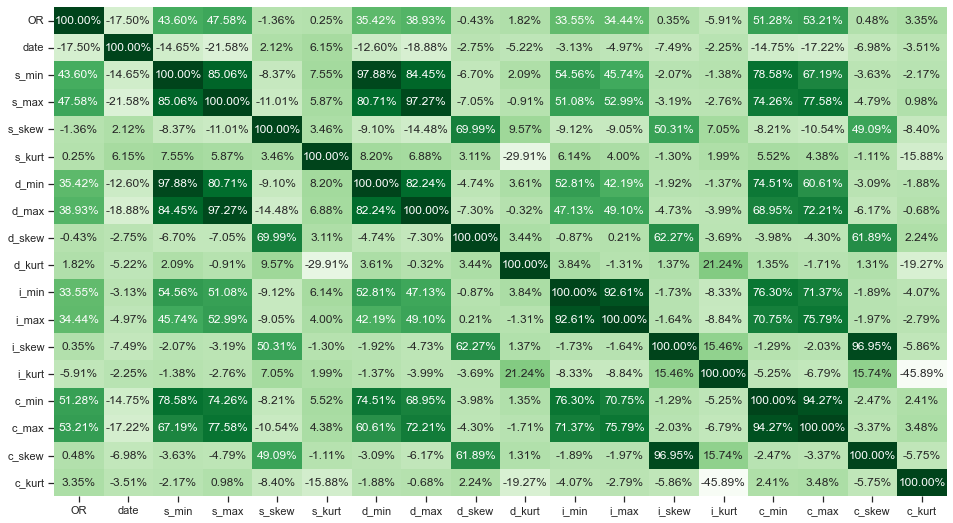

In [20]:
plt.figure(figsize=(16, 9))
# Please use a function of Pandas here.
corr = df_dataset.corr()
# Plot a heatmap with Seaborn
sns.heatmap(corr, cbar=False, fmt='.2%', annot=True, cmap='Greens')

## 3-1 / (Training / Testing) & (X / Y) Set 

In [21]:
df_train = df_dataset.iloc[0:382]
df_test = df_dataset.iloc[382:392]

In [22]:
train_x = df_train.drop(columns=['OR', 'date'])
train_y = df_train['OR']

test_x = df_test.drop(columns=['OR', 'date'])
test_y = df_test['OR']

## 3-2 / Models 10++ : Regression

In [23]:
# We will try a lot of models later

from sklearn.model_selection import GridSearchCV                     
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVC, NuSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsRegressor(),
    SVR(),
    NuSVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]

In [24]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]

for clf in classifiers:
  for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

    clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
    
    train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
    train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

    valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
    valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
    
    train_acc_list.append(train_acc)
    valid_acc_list.append(valid_acc)

  print( clf.__class__.__name__ )        # print classifier's name
    # print("train MSE: ", train_acc)
    # print("test MSE: ", valid_acc)
    
  print((
    'average train MSE: {}\n' +
    '    min train MSE: {}\n' +
    '    max train MSE: {}\n' +
    'average valid MSE: {}\n' +
    '    min valid MSE: {}\n' +
    '    max valid MSE: {}').format(
    np.mean(train_acc_list),                          # 輸出平均訓練準確度
    np.min(train_acc_list),                           # 輸出最低訓練準確度
    np.max(train_acc_list),                           # 輸出最高訓練準確度
    np.mean(valid_acc_list),                          # 輸出平均驗證準確度
    np.min(valid_acc_list),                           # 輸出最低驗證準確度
    np.max(valid_acc_list)                            # 輸出最高驗證準確度
  ))

  best.append(np.min(valid_acc_list))
  avg.append(np.mean(valid_acc_list))

  print("="*30)

KNeighborsRegressor
average train MSE: 1450.0429115882457
    min train MSE: 1229.9342073561452
    max train MSE: 1573.0793844247942
average valid MSE: 8807.563567689966
    min valid MSE: 6295.403185595567
    max valid MSE: 13555.306385041553
SVR
average train MSE: 2242.4521106295674
    min train MSE: 1229.9342073561452
    max train MSE: 3285.5569325084416
average valid MSE: 10481.297076724917
    min valid MSE: 6295.403185595567
    max valid MSE: 13651.655576065788
NuSVR
average train MSE: 2425.0755658692037
    min train MSE: 1229.9342073561452
    max train MSE: 3285.5569325084416
average valid MSE: 10712.153089146579
    min valid MSE: 6295.403185595567
    max valid MSE: 13651.655576065788
DecisionTreeRegressor
average train MSE: 1818.8066744019022
    min train MSE: 0.0
    max train MSE: 3285.5569325084416
average valid MSE: 12043.32123490339
    min valid MSE: 6295.403185595567
    max valid MSE: 20775.672437673133
RandomForestRegressor
average train MSE: 1510.86668605359

## 3-3 / Figures: Best Results

<AxesSubplot:>

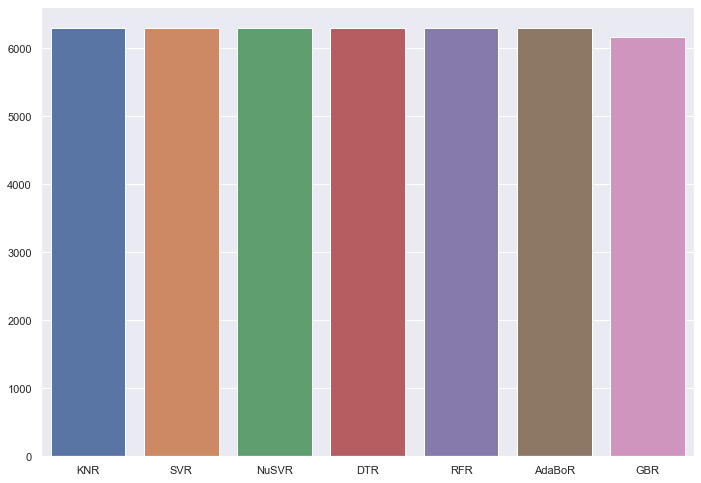

In [25]:
xx = ['KNR', 'SVR', 'NuSVR', 'DTR', 'RFR', 'AdaBoR', 'GBR']
yy = best
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=xx, y=yy)

## 3-4 / FIgures: Average Results

<AxesSubplot:>

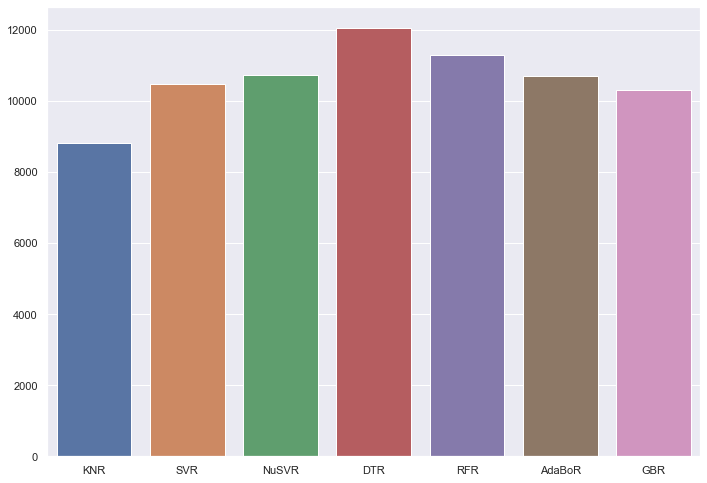

In [26]:
xx = ['KNR', 'SVR', 'NuSVR', 'DTR', 'RFR', 'AdaBoR', 'GBR']
yy = avg
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=xx, y=yy)

## 3-5 / Select Best Model

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
param_grid = {'learning_rate':[0.1, 0.01, 0.001], 'n_estimators':[100, 300], 'subsample':[1], 'max_depth':[3, 5, 7]}

# Split data into "trainning data", "testing data", and "validation data"
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.4, random_state=12)
# Try different model parameters
grid = GridSearchCV(GradientBoostingRegressor(random_state=19477), param_grid, verbose=5, n_jobs=-1)
# Train model
grid.fit(train_x, train_y)

grid.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=-2.808 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=-0.170 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=-9.127 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=-0.276 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1;, score=0.187 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1;, score=-13.432 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1;, score=-4.045 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1;, score=-0.569 total time=   0.3s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=300, subs

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1}

In [13]:
# 模型訓練

from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
from sklearn.metrics import mean_squared_error, mean_absolute_error

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍


train_acc_list = []                                   # 儲存每次訓練模型的準確度
valid_acc_list = []                                   # 儲存每次驗證模型的準確度
best = []
avg = []

# train_index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
# valid_index = [21, 22, 23, 24, 25, 26, 27, 28]
clf = GradientBoostingRegressor(random_state=19477, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1)

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
  train_x_split = train_x.iloc[train_index]         # 產生訓練資料
  train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
  valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
  valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤

  clf.fit(train_x_split, train_y_split)             # 訓練決策樹模型
  
  train_pred_y = clf.predict(train_x_split)         # 確認模型是否訓練成功
  train_acc = mean_squared_error(train_y_split, train_pred_y) / len(train_y_split)

  valid_pred_y = clf.predict(valid_x_split)         # 驗證模型是否訓練成功
  valid_acc = mean_squared_error(valid_y_split, valid_pred_y) / len(valid_y_split)
  
  train_acc_list.append(train_acc)
  valid_acc_list.append(valid_acc)

print( clf.__class__.__name__ )        # print classifier's name
  # print("train MSE: ", train_acc)
  # print("test MSE: ", valid_acc)
  
print((
  'average train MSE: {}\n' +
  '    min train MSE: {}\n' +
  '    max train MSE: {}\n' +
  'average valid MSE: {}\n' +
  '    min valid MSE: {}\n' +
  '    max valid MSE: {}').format(
  np.mean(train_acc_list),                          # 輸出平均訓練準確度
  np.min(train_acc_list),                           # 輸出最低訓練準確度
  np.max(train_acc_list),                           # 輸出最高訓練準確度
  np.mean(valid_acc_list),                          # 輸出平均驗證準確度
  np.min(valid_acc_list),                           # 輸出最低驗證準確度
  np.max(valid_acc_list)                            # 輸出最高驗證準確度
))

best.append(np.min(valid_acc_list))
avg.append(np.mean(valid_acc_list))

print("="*30)

GradientBoostingRegressor
average train MSE: 23.47530420319791
    min train MSE: 19.886079768883075
    max train MSE: 27.040562318185867
average valid MSE: 8437.510413729771
    min valid MSE: 6250.8072643378855
    max valid MSE: 11173.931792188272


## 3-6 / Figures : Training Results

<AxesSubplot:>

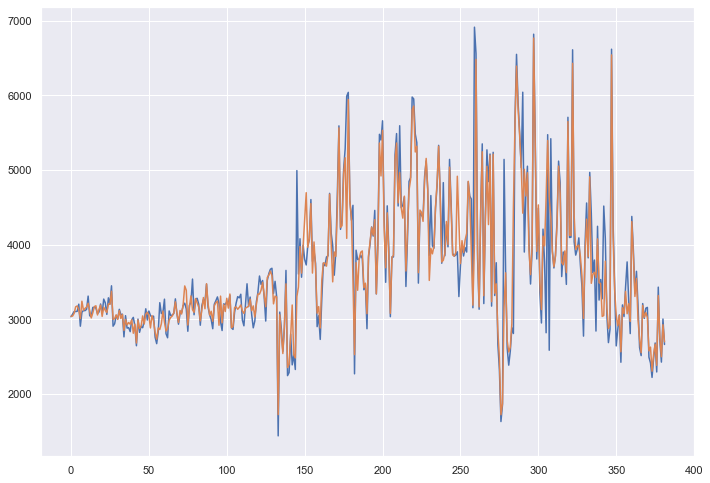

In [14]:
l = len(train_x)

x = np.arange(0, l)
y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( train_y[idx] )
  y_pred.append( clf.predict( train_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

## 3-7 / Figures : Testing Results

MSE: 52600.43931697629
MAE: 52.59145538722585


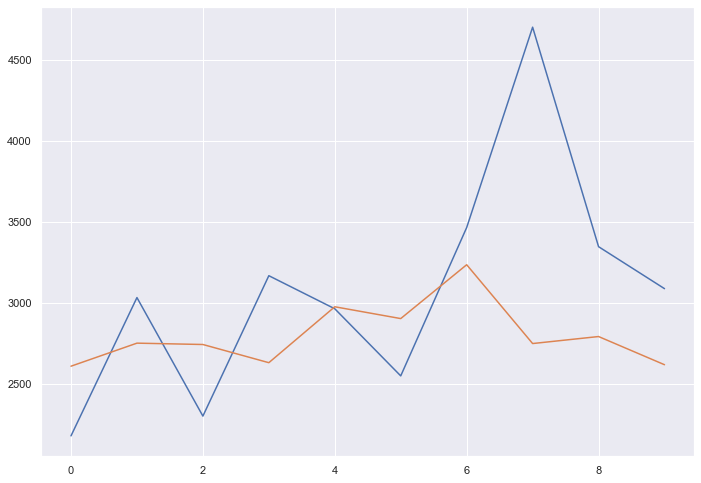

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

l = len(test_x)
x = np.arange(0, l)

y_true = []
y_pred = []

for idx in range( l ):
  # print( train_y[idx] )
  y_true.append( test_y.iloc[idx] )
  y_pred.append( clf.predict( test_x.iloc[idx].values.reshape(1, -1))[0] )
  # y_true = y_true.append( train_y[idx] )
  # y_pred = y_pred.append( clf.predict( train_x[idx] ) )

fig, ax = plt.subplots()
sns.lineplot(x=x, y=y_true, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)

print(f"MSE: {mean_squared_error(y_true, y_pred) / len(y_true)}") 
print(f"MAE: {mean_absolute_error(y_true, y_pred) / len(y_true)}") 